# Objective Analysing Data scice Books

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [177]:
df = pd.read_csv("final_book_dataset_kaggle2.csv")

In [178]:
df.info() ## few fields have null values in it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

In [179]:
df["pages"] = df["pages"].apply(lambda x : x if type(x)==str else None)

In [180]:
def is_numeric(s):
    try:
        float(s)  # Replace commas in numeric strings
        return True
    except ValueError:
        return False

In [181]:
df["pages"] = df["pages"].fillna(0)
df["pages"] = df["pages"].apply(lambda x : x if is_numeric(x) else 0)
df["pages"] = df["pages"].astype(int)

In [182]:
df["n_reviews"] = df["n_reviews"].astype(str)
df["n_reviews"] = df["n_reviews"].apply(lambda x : x.replace(',',""))
df["n_reviews"] = df["n_reviews"].astype(float)

# EDA

In [183]:
## Checking price vs Reviews

In [184]:
px.scatter(data_frame = df, x = "price" , y= "avg_reviews")

In [185]:
px.scatter(data_frame = df, x = "price" , y= "pages")

In [186]:
### More the pages , higher the price of book

#### Best Python book

In [174]:
## Filtering the only the python books
pythonBooks = df[df["title"].str.contains("Python")]
pythonBooks.nlargest(10,["n_reviews", "avg_reviews"]) 

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
22,Monty Python and the Holy Grail (Special Edition),NaN,9.99,9.99,0,4.7,10103.0,85%,8%,3%,1%,2%,7.5 x 5.5 x 0.5 inches; 3.2 Ounces,NaN,"Unqualified, Japanese (Dolby Digital 2.0 Mono)...",NaN,NaN,/Monty-Python-Holy-Grail-Special/dp/B00005O3VC...,https://www.amazon.com/Monty-Python-Holy-Grail...
633,"Python Crash Course, 2nd Edition: A Hands-On, ...",[ Eric Matthes],23.99,23.99,544,4.7,7767.0,81%,13%,4%,1%,1%,NaN,NaN,"""Brilliant.""","No Starch Press; 2nd edition (May 21, 2019)",NaN,/Python-Crash-Course-Eric-Matthes-ebook/dp/B07...,https://www.amazon.com/Python-Crash-Course-Eri...
394,Python: - The Bible- 3 Manuscripts in 1 book: ...,NaN,27.97,27.97,375,4.3,4228.0,64%,16%,10%,4%,6%,6 x 0.85 x 9 inches,1.11 pounds,English,"Independently published (April 28, 2018)",978-1980953906,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
528,Monty Python's Life Of Brian - The Immaculate ...,NaN,9.48,9.48,0,4.8,3678.0,86%,9%,4%,1%,NaN,6.75 x 5 x 0.25 inches; 1.6 Ounces,NaN,NaN,NaN,NaN,/Monty-Pythons-Life-Brian-Immaculate/dp/B000VE...,https://www.amazon.com/Monty-Pythons-Life-Bria...
569,Monty Python's Life Of Brian [DVD],NaN,18.85,18.85,0,4.8,3678.0,86%,9%,4%,1%,NaN,7.5 x 5.38 x 0.6 inches; 4 Ounces,NaN,English (Dolby Digital 2.0 Mono),NaN,NaN,/Monty-Pythons-Brian-Graham-Chapman/dp/6305388...,https://www.amazon.com/Monty-Pythons-Brian-Gra...
582,Monty Python's The Meaning of Life [Blu-ray],NaN,9.99,9.99,0,4.7,3337.0,82%,10%,4%,2%,2%,6.75 x 5.3 x 0.35 inches; 2.4 Ounces,NaN,"English (DTS-HD Master Audio 5.1), French (DTS...",NaN,NaN,/Monty-Pythons-Meaning-Life-Blu-ray/dp/B07G24K...,https://www.amazon.com/Monty-Pythons-Meaning-L...
532,Python: For Beginners: A Crash Course Guide To...,[ Timothy C. Needham],13.66,13.66,135,4.3,3142.0,66%,16%,10%,3%,5%,6 x 0.31 x 9 inches,6.7 ounces,English,"Independently published (September 21, 2017)",66,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
61,"Automate the Boring Stuff with Python, 2nd Edi...",[ Al Sweigart],26.49,26.49,592,4.7,2672.0,82%,12%,3%,1%,1%,7 x 1.31 x 9.31 inches,3.53 ounces,English,"No Starch Press; 2nd edition (November 12, 2019)",-34%,/Automate-Boring-Stuff-Python-2nd/dp/159327992...,https://www.amazon.com/Automate-Boring-Stuff-P...
32,Python for Everybody: Exploring Data in Python 3,"[ Charles R. Severance, Aimee Andrion, et al.]",0.99,0.99,387,4.6,2568.0,76%,16%,5%,2%,2%,NaN,NaN,English,NaN,NaN,/Python-Everybody-Exploring-Data-ebook/dp/B01I...,https://www.amazon.com/Python-Everybody-Explor...
629,Learning Python: Powerful Object-Oriented Prog...,NaN,46.99,16.57 - 46.99,1650,4.5,1724.0,74%,14%,7%,3%,3%,NaN,NaN,English,"O'Reilly Media; 5th edition (June 12, 2013)",Python,/Learning-Python-Powerful-Object-Oriented-Prog...,https://www.amazon.com/Learning-Python-Powerfu...


In [188]:
## Filtering the only the ML books
pythonBooks = df[df["title"].str.contains("Machine Learning")]
pythonBooks.nlargest(10,["n_reviews", "avg_reviews"]) 

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
478,"Hands-On Machine Learning with Scikit-Learn, K...",[ Aurélien Géron],57.49,57.49,856,4.8,3129.0,85%,10%,3%,1%,2%,7 x 1.2 x 9.2 inches,2.8 pounds,English,"O'Reilly Media; 2nd edition (October 15, 2019)",978-1492032649,/Hands-Machine-Learning-Scikit-Learn-TensorFlo...,https://www.amazon.com/Hands-Machine-Learning-...
701,Machine Learning For Absolute Beginners: A Pla...,NaN,NaN,NaN,167,4.5,1123.0,68%,18%,8%,3%,2%,NaN,NaN,English,"Scatterplot Press; 2nd edition (June 21, 2017)",NaN,/Machine-Learning-Absolute-Beginners-Introduct...,https://www.amazon.com/Machine-Learning-Absolu...
717,The Hundred-Page Machine Learning Book,[ Andriy Burkov],31.99,26.50 - 31.99,160,4.6,839.0,80%,10%,4%,2%,3%,7.5 x 0.38 x 9.25 inches,13.8 ounces,English,"Andriy Burkov (January 13, 2019)",978-1999579500,/Hundred-Page-Machine-Learning-Book/dp/1999579...,https://www.amazon.com/Hundred-Page-Machine-Le...
720,Pattern Recognition and Machine Learning (Info...,[ Christopher M. Bishop],105.22,90.99 - 105.22,738,4.6,687.0,76%,13%,6%,3%,2%,7.7 x 1.3 x 10.2 inches,4.73 pounds,English,"Springer (August 17, 2006)",978-0387310732,/Pattern-Recognition-Learning-Information-Stat...,https://www.amazon.com/Pattern-Recognition-Lea...
678,Mathematics for Machine Learning,NaN,48.99,48.99,398,4.7,608.0,80%,13%,3%,2%,2%,7 x 0.92 x 10 inches,1.76 pounds,English,Cambridge University Press; 1st edition (April...,978-1108455145,/Mathematics-Machine-Learning-Peter-Deisenroth...,https://www.amazon.com/Mathematics-Machine-Lea...
591,Introduction to Machine Learning with Python: ...,NaN,49.35,29.76 - 49.35,398,4.5,591.0,75%,15%,3%,3%,5%,7 x 0.82 x 9.19 inches,1.3 pounds,English,"O'Reilly Media; 1st edition (November 15, 2016)",978-1449369415,/Introduction-Machine-Learning-Python-Scientis...,https://www.amazon.com/Introduction-Machine-Le...
51,Machine Learning: 4 Books in 1: The #1 Beginne...,"[ Andrew Park, and , Russell Newton]",NaN,NaN,0,4.7,290.0,83%,10%,3%,1%,3%,NaN,NaN,NaN,NaN,NaN,/Data-Science-Beginners-Programming-Learning/d...,https://www.amazon.com/Data-Science-Beginners-...
241,PYTHON: Learn Coding Programs with Python Prog...,[ TechExp Academy],24.90,19.66 - 24.90,400,4.1,273.0,60%,15%,12%,5%,8%,8 x 0.91 x 10 inches,1.9 pounds,English,"Independently published (December 24, 2021)",,/PYTHON-Programming-Analytics-Beginners-Manusc...,https://www.amazon.com/PYTHON-Programming-Anal...
477,Ultimate Step by Step Guide to Machine Learnin...,NaN,NaN,NaN,70,4.2,271.0,62%,15%,12%,5%,6%,NaN,NaN,English,NaN,NaN,/Ultimate-Guide-Machine-Learning-Python-ebook/...,https://www.amazon.com/Ultimate-Guide-Machine-...
726,Machine Learning Design Patterns: Solutions to...,"[ Valliappa Lakshmanan, Sara Robinson, et al.]",36.99,36.99,408,4.6,263.0,73%,17%,6%,3%,1%,9.06 x 0.94 x 6.85 inches,1.45 pounds,English,"O'Reilly Media; 1st edition (November 10, 2020)",,/Machine-Learning-Design-Patterns-Preparation/...,https://www.amazon.com/Machine-Learning-Design...


In [189]:
## Using Kmeans clustering to categories the book

In [190]:
## Clustring the book titles using text vectorziation concept 

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = "english" , ngram_range = (1,2))
X = vectorizer.fit_transform(df["title"])

#### Identifing Optimial number of clustring using Elbow method 

In [192]:
from sklearn.cluster import KMeans
K = range(2,10)
sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters = k , max_iter = 600 , n_init = 10)
    km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

Text(0, 0.5, 'Sum of square Numbers')

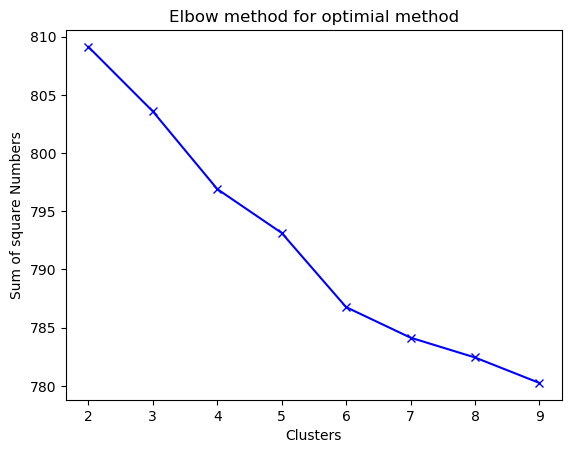

In [193]:
plt.plot(K, sum_of_squared_distances , "bx-")
plt.title("Elbow method for optimial method")
plt.xlabel("Clusters")
plt.ylabel("Sum of square Numbers")

In [194]:
Optimal_k = 4
model = KMeans(n_clusters = Optimal_k ,init = "k-means++" ,max_iter = 600 , n_init = 10)
model.fit(X)
labels = model.labels_
book_cl = pd.DataFrame(list(zip(df["title"],labels)), columns = ["title","cluster"])

In [195]:
book_cl

,title,cluster
0,Data Analysis Using R (Low Priced Edition): A ...,2
1,Head First Data Analysis: A learner's guide to...,2
2,Guerrilla Data Analysis Using Microsoft Excel:...,2
3,Python for Data Analysis: Data Wrangling with ...,2
4,Excel Data Analysis For Dummies (For Dummies (...,2
...,...,...
825,Deep Learning: Engage the World Change the World,0
826,Machine Learning in Finance: From Theory to Pr...,0
827,Practical Deep Learning at Scale with MLflow: ...,0
828,Clinical Biostatistics and Epidemiology Made R...,0


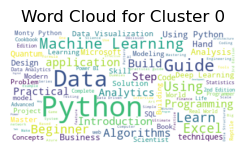

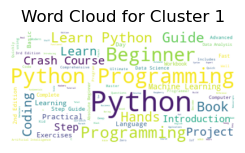

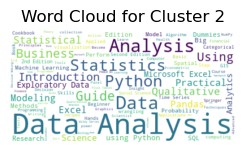

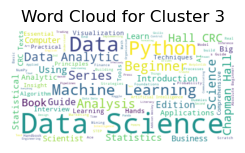

In [196]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
for k in range(Optimal_k):
    # Filter titles by the current cluster
    text = book_cl[book_cl['cluster'] == k]['title'].str.cat(sep=" ")
    
    # Generate the word cloud
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    
    # Display the word cloud
    plt.subplot(2,2 , k+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Cluster {k}")
    plt.show()